<h1>Notebook feta per Rubén Álvarez i Pol Pérez </h1>

___

<h1><u>Importacions i lectura del text inicial</u></h1>

In [3]:
%pip install -r requirements.txt --ignore-installed

  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached interpret-0.6.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2023.12.25-cp311-cp311-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached scipy-1.13.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
  Using cached interpret_core-0.6.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached dash-2.16.1-py3-none-any.whl.metadata (10 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached dash_html_components-2.

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\ralva\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\pywin32_system32\\pythoncom311.dll'
Check the permissions.


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\ralva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# Lectura de dades (Movie Reviews Corpus) NLTK
import re

import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer


import nltk
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import sent_tokenize
from nltk import pos_tag
from nltk.corpus import movie_reviews as mr
from nltk.corpus import stopwords
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.wsd import lesk


import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ralva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ralva\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ralva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\ralva\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ralva\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<h1> <a href= https://gebakx.github.io/plh/s4/index.html#14>Pràctica 2.a: Detecció d'opinions (Supervised Learning) </a> </h1>

___

La variable `all_texts` és una llista  conté totsels textos. La variable `all_labels` és una llista que conté les etiquetes reals (true labels) corresponents al text de la mateixa posició a `all_texts`.

In [5]:
A_all_texts = []
A_all_categories = []

for fileid in mr.fileids():
    A_all_texts.append(mr.raw(fileid))
    A_all_categories.append(mr.categories(fileid)[0])

In [6]:
A_all_categories.count('neg')
A_all_categories.count('pos')

1000

<h2><u>Preprocessat</u></h2>

Definim la funció `preprocessing(text)` que rep un text i retorna el text preprocessat. Utilitzem un *docstring* per especificar el que fa la fucnió.

In [7]:
def preprocessing(text : str) -> str:
  """Preprocessat de text per a anàlisi de sentiment. Aplica:
      - Eliminació de dígits
      - Conversió a minúscules
      - Substitució de dos espais per un
      - Eliminació de tabs
      - Lematització

  Args:
      text (str): text to preprocess

  Returns:
      String: text preprocessed
  """

  for num in range(10):
    text = text.replace(str(num), "")

  text = text.lower()

  text = re.sub(" +", " ", text)

  text = text.replace("\n ", "\n  ")

  text = text.replace('\t','')

  lemmatizer = WordNetLemmatizer()
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
  
  return text

Apliquem el preprocessat i el guardem en la variable `all_texts_preprocessed`.	

In [8]:
A_all_preprocesed_texts = []

for text in A_all_texts:
  text = preprocessing(text)
  A_all_preprocesed_texts.append(text)

<h2><u>Definició i validació del model</u></h2>

<h3><u>Separació train i test</u></h3>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(A_all_preprocesed_texts, A_all_categories, test_size=0.2, random_state=14)

<h3><u>Aplicació Count Vectorizer</u></h3>

Apliquem CountVectorizer eliminant stopwords per poder aplicar el model.

In [10]:
# Crear un objecte CountVectorizer eliminant les stopwords
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=5)

# Ajustar el vectoritzador a les dades d'entrenament
train_matrix = vectorizer.fit_transform(X_train)

# Transformar les dades de test
test_matrix = vectorizer.transform(X_test)

<h3><u>Grid search cross validation (Random Forest)</u></h3>

Definim els possibles hiperparàmetres i fem una cerca de graella per trobar els millors hiperparàmetres.

In [11]:
#Hiperparàmetres
n_estimators = [100, 500, 1000]
max_depth = [5, 10]
min_samples_split = [5, 10]
min_samples_leaf = [2, 5]

In [12]:
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid, cv=5)

In [13]:
rf_cv.fit(train_matrix, y_train)
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))

Tuned Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 1000}


#### Hiperparàmetres obtinguts amb el grid search (per no haver de fer el grid search cada cop)

In [14]:
rf_cv.best_params_ = {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000}

<h3><u>Grid search cross validation (MLP)</u></h3>

Definim els possibles hiperparàmetres i fem una cerca de graella per trobar els millors hiperparàmetres.

In [15]:
#Hiperparàmetres
hidden_layer_sizes = [(100,), (200,), (300,)]
activation = ['relu', 'tanh']
alpha = [0.0001, 0.001, 0.01]

In [16]:
param_grid = {'hidden_layer_sizes': hidden_layer_sizes, 'activation': activation, 'alpha': alpha}

mlp = MLPClassifier()
mlp_cv = GridSearchCV(mlp, param_grid, cv=5)

In [17]:
mlp_cv.fit(train_matrix, y_train)
print("Tuned MLP Parameters: {}".format(mlp_cv.best_params_))

Tuned MLP Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (300,)}


#### Hiperparàmetres obtinguts amb el grid search (per no haver de fer el grid search cada cop)

In [29]:
mlp_cv.best_params_ = {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (300,)}

<h3><u>Random Forest amb els millors paràmetres</u></h3>

In [30]:
classifier = RandomForestClassifier(random_state=14, n_estimators=rf_cv.best_params_['n_estimators'], max_depth=rf_cv.best_params_['max_depth'], min_samples_split=rf_cv.best_params_['min_samples_split'], min_samples_leaf=rf_cv.best_params_['min_samples_leaf'])

classifier.fit(train_matrix, y_train)

test_predictions = classifier.predict(test_matrix)

<h3><u>Multi-Layer Perceptron amb els millors paràmetres</u></h3>

In [31]:
classifier2 = MLPClassifier(random_state=14, hidden_layer_sizes=mlp_cv.best_params_['hidden_layer_sizes'], activation=mlp_cv.best_params_['activation'], alpha=mlp_cv.best_params_['alpha'])
classifier2.fit(train_matrix, y_train)
test_predictions2 = classifier2.predict(test_matrix)

<h2><u>Resultats aplicant el model a les dades test</u></h2>

Mirem els resultats del nostre model i els comparem amb les etiquetes reals. Posem els resultats incorrectes en la llista `errors`.

In [32]:
accuracy = accuracy_score(y_test, test_predictions)

accuracy

0.8625

In [33]:
accuracy = accuracy_score(y_test, test_predictions2)

accuracy

0.86

Si comparem els resultats d'accuracy de Random Forest i MLP, veiem que Random Forest té un accuracy més alt. Per la qual cosa el farem servir per a la següent part de la pràctica.

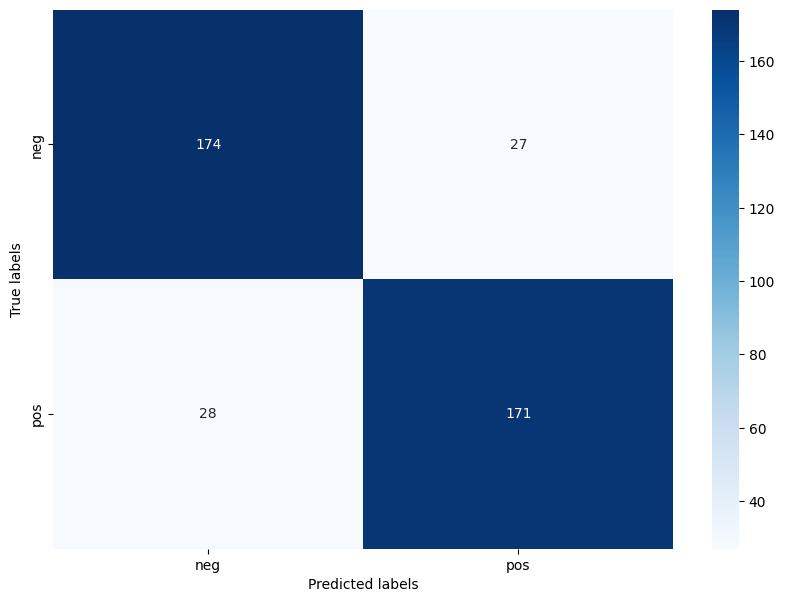

In [34]:
conf_matrix = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

<h2><u>Analisi de resultats</u></h2>

In [35]:
errors = []

for i, prediction in enumerate(test_predictions):
    if prediction != y_test[i]:
        errors.append((i, prediction, y_test[i]))

In [36]:
def analyze_error(error):
    """Donat un error, imprimeix la predicció, la categoria real i el text de la review on s'ha produït l'error

    Args:
        error (tuple(int, str, str)): tupla amb la posició de l'error, la predicció i la categoria real
    """
    i, prediction, real = error
    print(f"Prediction: {prediction}")
    print(f"Real_category: {real}")
    print("-----------------------------")
    print(f"Text: {X_test[i][:1000]}")

In [37]:
for error in errors:
    analyze_error(error)

Prediction: neg
Real_category: pos
-----------------------------
Text: when you go to the movie a much a i do , you unfortunately end up seeing certain movie trailer one too many time . such wa the case with frequency . every time i went to a screening , there wa the frequency preview . it looked awful . it looked cheesy , sappy and ridiculous . it looked like a flop . well , whoever put that trailer together should be fired , because in term of pure entertainment , frequency is one of the best of the year thus far . frequency boast a compelling story line . an occurrence of freakish solar activity allows police detective john sullivan ( james caviezel ) to speak to his fireman father frank sullivan ( dennis quaid ) through a ham radio , despite the fact that frank ha been dead for year . john is able to give his father information that prevents his death in a warehouse fire , but by doing so cause other change . somehow , a serial killer's reign of terror , which in the original timel

<h4><strong><u>Textos ambigus </u></strong></h4>
<h5>El nostre model troba problemes a l'hora de discernir entre textos que poden resultar ambigus, es a dir, aquells que no tenen una sola interpretació en termes de positivitat o negativitat. A continuació, es mostra un exemple de text ambigu: </h5>

<p><i>The thirteenth floor is a bland , obligatory exercise in genre film-making . 
if i hadn't recently watched the matrix and open your eyes -- both of which are similar but far superior -- i might have been a little nicer to this picture . 
craig bierko makes an adequate hero as douglas hall , the rich co-creator of a perfect human world simulation who is suddenly blamed for the murder of his boss ( armin mueller-stahl ) . 
everything that was subtle and smart about the previously mentioned films is battered over our heads in this one , and characters stare at each other for maddeningly-long periods of time and refuse to communicate on any realistic level . 
the acting is okay , but the film suffers from every logical flaw one could think of , and features a script ( co-penned by director josef rusnak ) loaded with cliches and stock characters . 
there are individual scenes and ideas that work -- i like the thought of a sentient computer program...</i></p>

<h4><strong><u>Textos amb diàleg de la pròpia pel·lícula </u></strong></h4>
<h5>Els textos amb diàleg de la pròpia pel·lícula són aquells que contenen frases o paraules que estàn en el guió de la pel·lícula. Això pot causar confusió, ja que aquestes no són descripcions de la película, sinó simplement esments de frases que hi apareixen, totalment independents de la calitat d'aquesta. A continuació, es mostren alguns exemples de textos amb frases de la pel·lícula:</h5>

<p><i>Well this is not mission : difficult , mr . hunt , it's mission : impossible . difficult should be a walk in the park for you . " ---agent swanbeck ( sir anthony hopkins ) , the series' new agent phelps , take ethan hunt ( tom cruise ) down a notch . a russian scientist ( rade serbedzija ) ha created a new virus ( and it antidote ) called chimera that destroys it host within twenty hour of injection . a rogue imf agent , sean ambrose ( dougray scott ) , want to use the disease and cure to blackmail a pharmaceutical company into selling him enough stock to make him owner of the company ( he know it will soon be worth it weight in gold thanks to the outbreak of the virus he is going to cause ) . posing a ethan hunt , ambrose gain the confidence of the scientist long enough to get only the cure , not realizing that the scientist had injected himself with the virus to prevent exactly what ambrose wa trying to do . the real ethan hunt is called in from his vacation to persuade beautiful...</i></p>

<h4><strong><u>Textos amb sarcasme</u></strong></h4>
<h5>Si alguna crítica és sarcàstica, el model segurament no la podrà interpretar correctament ja que s'utilitzaran paraules positives per descriure negativament. A continuació, es mostren alguns exemples de textos amb sarcasme:</h5>

<p><i>It's not often that i laugh so hard at a movie that my head hurt . but that's just what happened to me at uhf , weird al yankovic's big screen debut . uhf is a television parody a la airplane , and like airplane , the movie is extraordinarily stupid . but it's dumb in the best way a movie can be dumb : it's so silly and outrageous it's hilarious . the movie star weird al a george newman , a world class nerd with a hyperactive imagination , the type who fantasizes he's indiana jones and who us hostess twinkie a hot dog bun . george is basically a loser ; his daydream and smart-alec attitude perpetually prevent him from holding onto a job for more than two week . but george finally get a chance to funnel his creativity into something productive when his uncle win channel in a poker game and make him the general manager of the struggling uhf television station . george revives channel with innovative programming : show like " wheel of fish " and movie like " conan , the librarian ...</i></p>

<h4><strong><u>Quan es parla de l'esperança que es tenia de la pel·lícula</u></strong></h4>
<h5>Si un review té una expectativa molt alta i la pel·lícula no arriba a aquesta expectativa, el model pot predir que és negativa i això també pot passar a la inversa. A continuació un exemple:</h5>

<p><i>when you go to the movie a much a i do , you unfortunately end up seeing certain movie trailer one too many time . such wa the case with frequency . every time i went to a screening , there wa the frequency preview . it looked awful . it looked cheesy , sappy and ridiculous . it looked like a flop . well , whoever put that trailer together should be fired , because in term of pure entertainment , frequency is one of the best of the year thus far . frequency boast a compelling story line . an occurrence of freakish solar activity allows police detective john sullivan ( james caviezel ) to speak to his fireman father frank sullivan ( dennis quaid ) through a ham radio , despite the fact that frank ha been dead for year . john is able to give his father information that prevents his death in a warehouse fire , but by doing so cause other change . somehow , a serial killer's reign of terror , which in the original timeline had been stopped at three murder , extends to ten victim ...</p></i>

<h1> <a href= https://gebakx.github.io/plh/s4/index.html#17> Pràctica 2.b: Detecció d'opinions (Unsupervised Learning) </a> </h1>

___

In [38]:
all_texts = []
all_categories = []

for fileid in mr.fileids():
    all_texts.append(mr.raw(fileid))
    all_categories.append(mr.categories(fileid)[0])

<h2><u>Preprocessat</u></h2>

Definim el prerpocessat a aplicar. Arreglem el format del text, eliminem números i convertim el text en minúscules.

In [39]:
def preprocessing(text):
  """Preprocessat de text per a anàlisi de sentiment. Aplica:
      - Eliminació de dígits
      - Conversió a minúscules
      - Substitució de dos espais per un
      - Eliminació de tabs

  Args:
      text (str): text to preprocess

  Returns:
      String: text preprocessed
  """
  
  for num in range(10):
    text = text.replace(str(num), "")

  text = text.lower()

  text = re.sub(" +", " ", text)

  text = text.replace("\n ", "\n  ")

  text = text.replace('\t','')
  
  return text

<h3><u>Separació train i test</u></h3>

In [40]:
X_train, X_test, y_train, y_test = train_test_split(all_texts, all_categories, test_size=0.2, random_state=14)

Apliquem el preprocessat als textos i els guardem en la variable `all_preprocesed_texts`.

In [41]:
all_preprocesed_texts = []

for text in X_test:
  text = preprocessing(text)
  all_preprocesed_texts.append(text)

<h2><u>Tokenització, decisió de categories gramaticals utilitzades i desambiguació amb Lesk</u></h2>

Definim tres funcions `get_all_sentiment_score(text)`, `get_adjective_sentiment_score(text)` i `get_name_adjective_adverb_sentiment_score(text)` que reben un text i retornen el sentiment score del text. 

Fem aquests tres models per poder contemplar les diferents combinacions de paraules que podem tenir en compte per calcular el sentiment score.

Aquestes funcions tokenitzen els textos en frases i després en paraules, decideixen quines paraules utilitzar i les desambigüen amb Lesk per poder extraure el sentiment score del text. Aquestes funcions retornen un número, si aquest és més gran o igual a zero, el text es considera positiu, sinó, el text es considera negatiu. 

In [42]:
def get_all_sentiment_score(text):
  """Calcula el sentiment score d'un text tenint en compte totes les paraules d'aquest. 
  1. Preprocessar el text
  2. Tokenitzar per frases
  3. Tokenitzar per paraules
  4. Desambiguació amb Lesk
  5. Calcular el setiment score del text 

  Args:
      text (str): text per a calcular el sentiment score d'un text

  Returns:
      Float: sentiment score
  """
  text = preprocessing(text)
  
  sentiment_score = 0
  sent_tokenize_list = sent_tokenize(text)
    
  for sentence in sent_tokenize_list:
      word = word_tokenize(sentence)
      tagged_words = pos_tag(word)
        
      for word, pos in tagged_words:
          synsets = wn.synsets(word) # Agafar el synset 
          if synsets:
              synset = lesk(text, word) # Desambiguació
              if synset:
                  senti_synset = swn.senti_synset(synset.name())
                  sentiment_score += senti_synset.pos_score() - senti_synset.neg_score()
                        
  return sentiment_score

In [43]:
def get_adjective_sentiment_score(text):
    """Calcula el sentiment score dels adjectius en un text
    1. Preprocessar el text
    2. Tokenitzar per frases
    3. Tokenitzar per paraules
    4. Identificació d'adjectius
    5. Desambiguació amb Lesk
    6. Calcular el setiment score del text 

    Args:
        text (str): text per a calcular el sentiment score

    Returns:
        Float: sentiment score
    """
    
    text = preprocessing(text)
    
    sentiment_score = 0
    sent_tokenize_list = sent_tokenize(text)
    
    for sentence in sent_tokenize_list:
        word = word_tokenize(sentence)
        tagged_words = pos_tag(word)
        
        for word, pos in tagged_words:
            if pos.startswith('JJ'):  # 'JJ' es el codi POS per a adjectius
                synsets = wn.synsets(word, pos=wn.ADJ)  # Només considera els synsets que son adjectius
                if synsets:
                    synset = lesk(text, word, pos=wn.ADJ)  # Només considera els synsets que son adjectius
                    if synset:
                        senti_synset = swn.senti_synset(synset.name())
                        sentiment_score += senti_synset.pos_score() - senti_synset.neg_score()
                        
    return sentiment_score

In [44]:
def get_name_adjective_adverb_sentiment_score(text):
    """Calcula el sentiment score dels noms, adjectius y adverbis en un text
    1. Preprocessar el text
    2. Tokenitzar per frases
    3. Tokenitzar per paraules
    4. Identificació d'adjectius, noms i adverbis
    5. Desambiguació amb Lesk
    6. Calcular el setiment score del text 

    Args:
        text (str): text per a calcular el sentiment score

    Returns:
        Float: sentiment score
    """
    
    text = preprocessing(text)
    
    sentiment_score = 0
    sent_tokenize_list = sent_tokenize(text)
    
    for sentence in sent_tokenize_list:
        word = word_tokenize(sentence)
        tagged_words = pos_tag(word)
        
        for word, pos in tagged_words:
            if pos.startswith(('JJ', 'NN', 'RB')):  # 'JJ' es el codi POS per a adjectius, 'NN' per a noms i 'RB' per adverbis
                synsets = wn.synsets(word, pos=[wn.NOUN, wn.ADJ, wn.ADV])  # Considera els synsets que son noms, adjectius i adverbis
                if synsets:
                    synset = lesk(text, word, pos=[wn.NOUN, wn.ADJ, wn.ADV])  # Considera els synsets que son noms, adjectius i adverbis
                    if synset:
                        senti_synset = swn.senti_synset(synset.name())
                        sentiment_score += senti_synset.pos_score() - senti_synset.neg_score()
                        
    return sentiment_score

Definim la nostra predicció final fent un ensamble dels tres models. Aquesta decisió ha sigut presa perquè així podem contemplar les diferents combinacions de paraules que poden aparèixer en un text. Les tres funcions tenen en compte els adjectius, ja que creiem que aquests són els que més poden influir en el sentiment score d'un text, tot i això hem decidit tenir en compte les altres dues funcións ja que els noms i adverbis també poden arribar a influir en la positivitat o negativitat d'un text.

Per tant, la nostra predicció final és la suma de les prediccions dels tres models. Si la suma és més gran o igual a zero, el text es considera positiu, sinó, el text es considera negatiu.

<h2><u>Resultats aplicació 2b</u></h2>

In [45]:
y_pred = []
y_pred_values = []

for text in all_preprocesed_texts:
    pred_value = get_adjective_sentiment_score(text) + get_name_adjective_adverb_sentiment_score(text) + get_all_sentiment_score(text)
    if pred_value >= 0:
        y_pred.append('pos')
    else:
        y_pred.append('neg')
    y_pred_values.append(pred_value)

In [46]:
# Calcular la precisión
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.645

<h3><u>Analisi dels resultats</u></h3>

<h4>Confusion matrix</h4>

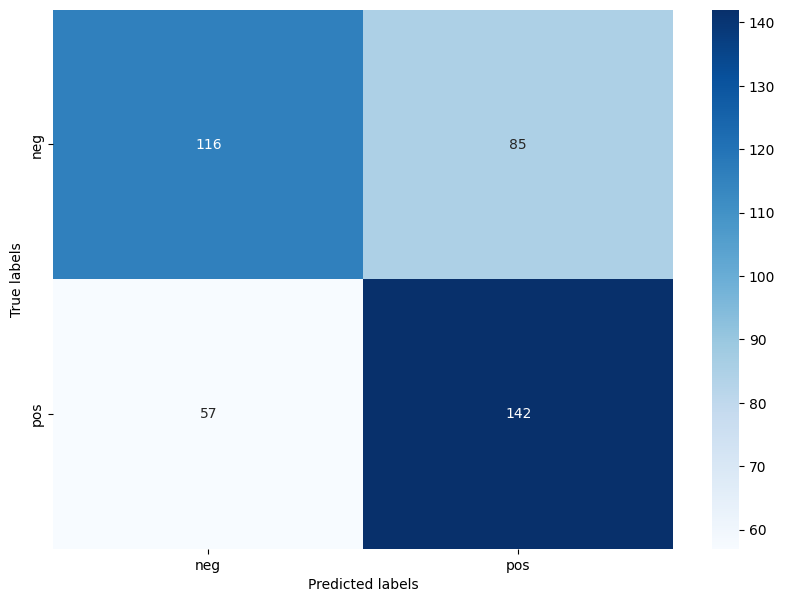

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

En primer lloc, si mirem la confusion matrix, podem veure que el nostre model falla més en predir els textos negatius que els positius. Això pot ser degut a que les crítiques negatives poden ser més complexes i tenir més matisos (com ara posibles comparacions amb pelicules que sí són bones) que les positives.

<h4>Anàlisi de textos amb errors</h4>

Apliquem un min-max scaler (amb mínim = -1 i màxim = 1) per a les prediccions donades pel model per poder veure els valors dels errors de forma més clara. Com més proper a 1, més positiu és el text i com més proper a -1, més negatiu és el text.

In [48]:
def min_max_scaling(llist_to_scale, new_min=-1, new_max=1):
    """Donada una llista d'errors, retorna una llista amb els  valor de predició aproximats predit pel model standaritzats

    Args:
        error_list (float): valor de predició aproximats predit pel model
        new_min (int, optional): valor mínim de la nova escala. Per defecte -1
        new_max (int, optional): valor màxim de la nova escala. Per defecte 1

    Returns:
        list: llista amb el format correcte del  valor de predició aproximats predit pel model
    """
    
    min_val = min(llist_to_scale)
    max_val = max(llist_to_scale)
    # Si el valor màxim i mínim són iguals, no fem res
    if max_val == min_val:
        return llist_to_scale
    
    else:
        scaled = [new_min + (value - min_val) * (new_max - new_min) / (max_val - min_val) for value in llist_to_scale]
    
    return scaled

In [49]:
y_pred_values = min_max_scaling(y_pred_values)

In [50]:
errors_b = []

for i, prediction in enumerate(y_pred):
    if prediction != y_test[i]:
        errors_b.append([i, prediction, y_test[i], y_pred_values[i]])

In [51]:
def analyze_error_b(error):
    """Donat un error, imprimeix la predicció, la categoria real i el text de la review on s'ha produït l'error

    Args:
        error (tuple(int, str, str)): tupla amb la posició de l'error, la predicció i la categoria real
    """
    i, prediction, real, value = error
    print(f"Prediction: {prediction}")
    print(f"Real_category: {real}")
    print(f"Value: {value}")
    print("-----------------------------")
    print(f"Text: {X_test[i][:1000]}")
    print("\n\n")

In [52]:
for error in errors_b:
    analyze_error_b(error)

Prediction: neg
Real_category: pos
Value: -0.18840579710144922
-----------------------------
Text: when you go to the movies as much as i do , you unfortunately end up seeing certain movie trailers one too many times . 
such was the case with frequency . 
every time i went to a screening , there was the frequency preview . 
it looked awful . 
it looked cheesy , sappy and ridiculous . 
it looked like a flop . 
well , whoever put that trailer together should be fired , because in terms of pure entertainment , frequency is one of the best of the year thus far . 
frequency boasts a compelling story line . 
an occurrence of freakish solar activity allows police detective john sullivan ( james caviezel ) to speak to his fireman father frank sullivan ( dennis quaid ) through a ham radio , despite the fact that frank has been dead for 30 years . 
john is able to give his father information that prevents his death in a warehouse fire , but by doing so causes other changes . 
somehow , a serial 

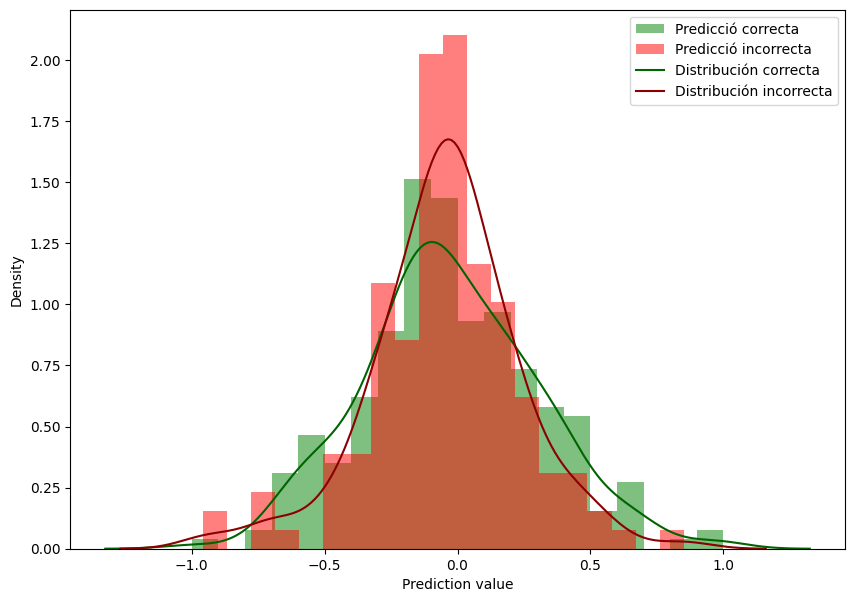

In [53]:
plt.figure(figsize=(10, 7))

correct_values = [value for i, value in enumerate(y_pred_values) if y_test[i] == y_pred[i]]
incorrect_values = [value for i, value in enumerate(y_pred_values) if y_test[i] != y_pred[i]]

plt.hist(correct_values, bins=20, alpha=0.5, label='Predicció correcta', color='green', density=True)
plt.hist(incorrect_values, bins=20, alpha=0.5, label='Predicció incorrecta', color='red', density=True)

sns.kdeplot(correct_values, color='darkgreen', label='Distribución correcta')
sns.kdeplot(incorrect_values, color='darkred', label='Distribución incorrecta')

plt.xlabel('Prediction value')
plt.ylabel('Density')
plt.legend()
plt.show()

Si observem el histograma de densitat, podem veure que la funció que defineix les prediccions incorrectes és una amb molt més densitat a prop de 0 que la funció que defineix les prediccions correctes. Això ens indica que els textos on ha fallat el nostre model són els que ha valorat com més neutres, cosa que pot haver causat la confusió del model. 

Per resumir, podem dir que el nostre model falla més en predir els textos que són més neutres, ja que aquests poden resultar més difícils de classificar.

In [54]:
# Veure errors que només es fan en el b
err_a = [err[0] for err in errors]
err_b = [err[0] for err in errors_b]

err_only_b = list(set(err_b) - set(err_a))

for i in err_only_b:
    print(f"Text {i} mal predit en 2b:\n{X_test[i][:1000]}\nPredicció erronia feta: {y_pred[i]}\n")

Text 6 mal predit en 2b:
 " tina ! ! ! fetch me the axe ! ! ! " 
a favourite book of mine called the golden turkey awards relates the story that when mommie dearest was unleashed upon unsuspecting audiences back in 1981 , paramount soon realised they had a problem on their hands . 
it wasn't just the film's disappointing box office performance . 
indeed , in the coming years some people would be going back to see it two , three , even six times . 
no , the main problem was that what was intended as a serious biopic of screen queen joan crawford was turning into the laugh riot of the year . 
in a desperate attempt to capitalise on this unexpected turn of events , some publicity hacks dreamed up outrageous print advertisements screaming : " mommie dearest : the biggest mommie of them all ! " . 
executives at paramount were appalled and soon had the ads withdrawn , but it was all too late . 
mommie dearest was already cementing its place in camp cinema history . 
unfortunately , faye duna

<h1><strong><u>Conclusions finals de la pràctica</u></strong></h1>

<h3><strong><u>Opinions dels models</u></strong></h3>
<h4><u>Model supervisat</u></h4>

En conclusió, el model de MLP és bastant adequat, ja que la seva precisió és de 86%. Tot i això, el model de Random Forest és millor, ja que la seva precisió és de 86,25% i el temps de predicció és menor. Podem dir que tots dos models donen la funcionalitat esperada i que són relativament útils per a la predicció de textos. Ens agradaria poder provar amb més dades per veure si la precisió dels models millora i poder confiar més en les seves prediccions ja que actualment no són suficientment altes per considerar-los com a bons.

<h4><u>Model no supervisat</u></h4>

En quant a les conclusions, podem dir que el nostre model ha predit més textos correctament que incorrectament. Tot i això, no creiem que amb una accuracy del 64.5% sigui suficient per poder considerar el nostre model com a bo. Per tant, creiem que el nostre model encara té marge de millora i podria ser preferible utilitzar més dades o optar per un model supervisat.

<h3><strong><u>Errors dels models</u></strong></h3>
<h4><u>Model supervisat</u></h4>
Es pot veure com els errors comesos són bastant lògics ja que la majoria dels textos que han estat mal classificats són textos ambigus, textos amb diàleg de la pròpia pel·lícula, textos amb sarcasme o textos amb una expectativa molt alta de la pel·lícula. Per tant, podem dir que el nostre model ha fet un bon treball en general però té dificultats a la hora de barrejar paraules positives amb paraules negatives en un mateix text.

<h4><u>Model no supervisat</u></h4>

Al veure els errors del nostre model, podem veure que la majoria dels textos que han estat mal classificats són textos que el model ha considerat com a neutres. Això pot ser degut a que aquests textos poden ser més difícils de classificar ja que poden tenir matisos que els fan semblar més positius o més negatius. El sentiment score d'aquests textos pot ser més proper a 0, cosa que pot haver causat la confusió del model. Tot i això, els errors no segueixen cap patró clar que haguem pogut identificar, per tant, no podem dir amb seguretat per què el model ha fallat en aquests casos. El fet de que el model no sigui supervisat pot haver causat aquesta manca de claredat en els errors ja que no hi ha un procés d'entrenament i correcció del model on podriem haver ajustat els paràmetres per millorar la seva precisió. Per últim, l'ús de Lesk pot haver fet que la desambiguació de les paraules sigui incorrecta, cosa que hauria pogut causar errors en la predicció del sentiment score dels textos.

<h3><strong><u>Formes de millorar els models</u></strong></h3>
Per millorar els models, podríem provar de fer un preprocessat més exhaustiu. Per això hauriem d'eliminar tot allò que no descriguís la pel·lícula en si, com ara els diàlegs de la pròpia pel·lícula. Això podria ajudar a millorar la precisió del model ja que així els textos no serien tan ambigus. 

Per altra banda, per millorar el segon model, podriem utilitzar eines alternatives a Lesk, per intentar millorar el procès de desambigüació de les paraules. També podriem considerar les paraules que no es trobèssin en el senti synset, sumant-li un pes extra per poder-les tenir en compte en el càlcul del sentiment score.
Potser podriem classificar les paraules com a positives(1) o negatives(0) en comptes de valors numèrics positius i negatius. Això ajudaria a fer que les dades estiguéssin millor distribuides i no tant centrades al voltant de 0, cosa que podria haver causat la confusió del model.

